In [18]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import scipy.stats as stats

In [19]:
import scipy.stats as stats
from statsmodels.formula.api import ols
from statsmodels.stats.anova import _get_covariance,anova_lm

In [20]:
from google.colab import drive
drive.mount('/content/drive' )

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [21]:
data = pd.read_csv('/content/drive/My Drive/diet.csv')

In [22]:
df = data.copy()

In [29]:
df.head()



,diet,preweight,weight6weeks,age
0,B,60,60.0,45
1,B,103,103.0,38
2,A,58,54.2,31
3,A,60,54.0,18
4,A,64,63.3,35


In [30]:
df.shape
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78 entries, 0 to 77
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   diet          78 non-null     object 
 1   preweight     78 non-null     int64  
 2   weight6weeks  78 non-null     float64
 3   age           78 non-null     int64  
dtypes: float64(1), int64(2), object(1)
memory usage: 2.6+ KB


,preweight,weight6weeks,age
count,78.000000,78.000000,78.000000
mean,72.525641,68.680769,34.025641
std,8.723344,8.924504,8.543205
min,58.000000,53.000000,18.000000
25%,66.000000,61.850000,28.250000
50%,72.000000,68.950000,34.000000
75%,78.000000,73.825000,39.000000
max,103.000000,103.000000,54.000000


In [32]:
df['weight_loss'] = df['weight6weeks'] - df['preweight' ]

# Defining the age groups
def categorize_age(age):
  if age >= 18 and age < 25:
    return "18-25"
  elif age >= 25 and age < 40:
    return "25-40"
  else:
    return "40+"

# Add the ‘age’ column to the DataFrame

df['age_category'] = df['age'].apply(categorize_age)

df .head()

,diet,preweight,weight6weeks,age,weight_loss,age_category
0,B,60,60.0,45,0.0,40+
1,B,103,103.0,38,0.0,25-40
2,A,58,54.2,31,-3.8,25-40
3,A,60,54.0,18,-6.0,18-25
4,A,64,63.3,35,-0.7,25-40


In [34]:
df.age_category.value_counts()



,0
diet,0
preweight,0
weight6weeks,0
age,0
weight_loss,0
age_category,0


In [35]:
df.isnull().sum()

,0
diet,0
preweight,0
weight6weeks,0
age,0
weight_loss,0
age_category,0


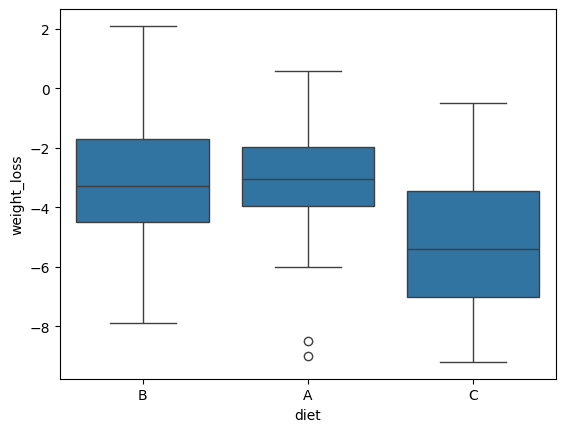

In [36]:
sns.boxplot(x="diet", y="weight_loss", data = df)
plt.show()


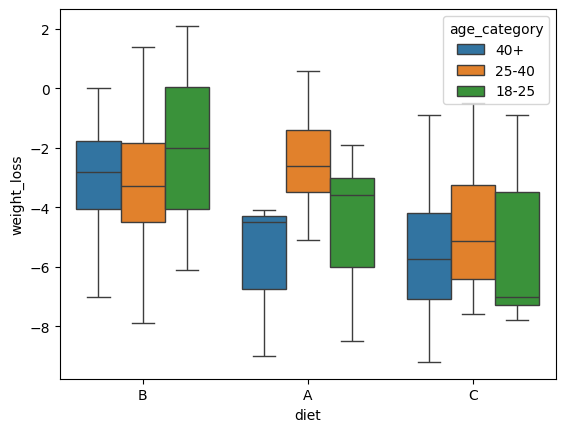

In [38]:
sns.boxplot(x="diet", y="weight_loss", hue="age_category", data=df)

plt.show()

In [39]:
w, p_value = stats.shapiro(df[ 'weight_loss'])

print('The p-value is', p_value)

The p-value is 0.8019883459468051


In [41]:
statistic, p_value = stats.levene(df[df['diet']=='A']['weight_loss'],
df[df['diet']=="B"]['weight_loss'],
df[df['diet']=='C']['weight_loss'])

print('The p-value is', p_value)


The p-value is 0.5376731304274011


In [42]:
weightloss_diet_A = df[df['diet']=="A"]['weight_loss']
weightloss_diet_B = df[df['diet']=='B']['weight_loss']
weightloss_diet_C = df[df['diet']=='C']['weight_loss']

In [43]:
from scipy.stats import f_oneway

In [46]:
test_stat, p_value = f_oneway(weightloss_diet_A, weightloss_diet_B, weightloss_diet_C)
print('The p-value is ', p_value)


The p-value is  0.0032290142385893524


In [57]:
if p_value < 0.05:
  print(f'As the p-value {p_value} is less than the level of significance, we reject the null hypothesis')
else:

  print(f'As the p-value {p_value} is greater than the level of significance, we fail to reject the null hypothesis')


As the p-value 0.05544168556142372 is greater than the level of significance, we fail to reject the null hypothesis


In [48]:
statistic, p_value = stats.levene(df[df['age_category' ]=='40+']['weight_loss'],
df[df['age_category' ]=='25-40' ]['weight_loss'],
df[df['age_category' ]=='18-25']['weight_loss'])

print('The p-value is', p_value)


The p-value is 0.12538330776005183


In [53]:
weightloss_Elderly = df[df['age_category' ]=='40+']['weight_loss']

weightloss_Middle_aged = df[df['age_category' ]=='25-40' ]['weight_loss']

weightloss_Young = df[df['age_category' ]=='18-25']['weight_loss']


In [54]:
from scipy.stats import f_oneway

# find the p-value
test_stat, p_value = f_oneway(weightloss_Elderly, weightloss_Middle_aged, weightloss_Young)
print('The p-value is ', p_value)

The p-value is  0.05544168556142372


In [56]:
if p_value <0.05:

  print(f'As the p-value {p_value} is less than the level of significance,we reject the null hypothesis')
else:

  print(f'As the p-value {p_value} is greater than the level of significance,we fail to reject the null hypothesis')


As the p-value 0.05544168556142372 is greater than the level of significance,we fail to reject the null hypothesis


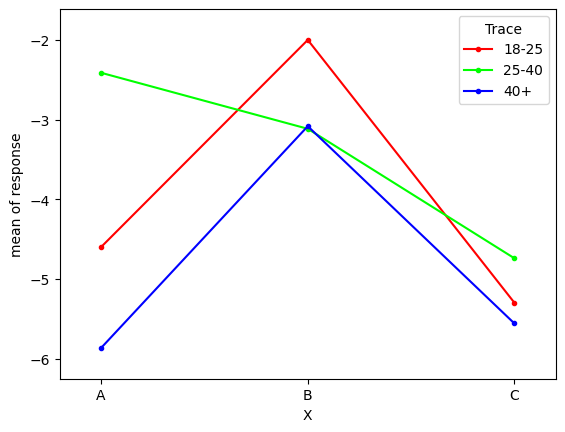

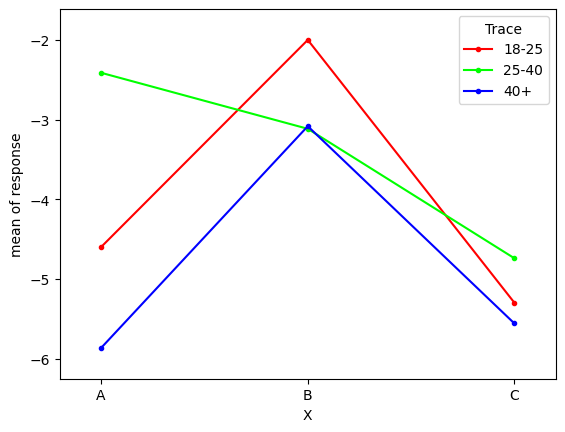

In [62]:
from statsmodels.graphics.factorplots import interaction_plot
interaction_plot(np.array(df['diet']),np.array(df['age_category']),np.array(df['weight_loss']))


In [64]:
formula = 'weight_loss ~ C(diet) + C(age_category) + C(diet):C(age_category)'
model = ols(formula, df).fit()

aov_table = anova_lm(model)

(aov_table)

,df,sum_sq,mean_sq,F,PR(>F)
C(diet),2.0,71.093689,35.546845,6.399140,0.002822
C(age_category),2.0,17.498000,8.749000,1.574994,0.214359
C(diet):C(age_category),4.0,29.390330,7.347582,1.322711,0.270226
Residual,69.0,383.290930,5.554941,NaN,NaN


In [71]:
row_name = 'C(diet):C(age_category)'
p_value_interaction = aov_table.loc[row_name, 'PR(>F)']

# print the conclusion based on p-value

if p_value_interaction <0.05:
  print(f'As the p-value {p_value_interaction} is less than the level of significance, we reject the null hypothesis')

else:
  print(f'As the p-value {p_value_interaction} is greater than the level of significance, we fail to reject the null hypothesis')


As the p-value 0.2702264784075801 is greater than the level of significance, we fail to reject the null hypothesis
